In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import HTML,Latex

In [17]:
'''
Copied from previous IPYNB : 07--3.1
Added the regularization terms to the cos functions
Function approximator class
'''
class FA:
    def __init__(self,
                 n_input_neurons=1,
                 n_hidden_neurons=12,
                 intermidiate_activation_function='sigmoid',
                 learning_rate=1e-2,
                 n_iters=1_000,
                regularization_strength=0):
        self.n_input_neurons = n_input_neurons
        self.n_hidden_neurons = n_hidden_neurons
        
        assert intermidiate_activation_function in  ['sigmoid','relu']
        self.activation_function = {'sigmoid':sigmoid,'relu':relu}[intermidiate_activation_function]
        
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization_strength = regularization_strength
        
    def fit(self,X,y):
        assert X.shape[0] == self.n_input_neurons
        assert y.shape[0] == 1
        assert y.shape[1] == X.shape[1], "Number of examples : should match in inputs and targets"

        self.cost_history = []

        # define hyper parameters.
        m = y.shape[1] # number of examples given
        n = self.n_input_neurons # input feature count
        h = self.n_hidden_neurons # hidden neuron count

        #initialize weights and biases.
        w = np.random.randn(h,1)
        b = np.random.randn(1,1)
        V = np.random.randn(h,n)
        c = np.random.randn(h,1)

        #fine tune parameters.
        start_time = time.time()
        for i in range(self.n_iters):
                
                # progress message : every 100 iteration except for the first one
                if i and not i%100:
                    time_now = time.time()
                    time_remaining = get_nice_time_dura_str ((self.n_iters - i) * (time_now - start_time) / i)
                    print(f"iteration : {i} ---> ETA : {time_remaining} ",end="\r")
                    

                #forward pass
                H = self.activation_function(V@X + c)
                y_pred = w.T@H + b

                #calculate the cost for the current parameters.
                cost = 1/(2*m) * np.sum((y_pred - y)**2)
                self.cost_history.append(cost)

                #backpropagation
                diff = (y_pred - y)
                
                if self.activation_function == sigmoid:
                    high_level_derivative = H * (1 - H)
                elif self.activation_function == relu:
                    high_level_derivative = np.where(H>=0,1.,0.)
 


                dEdb  = diff.sum() / m
                dEdw = H@diff.T / m
                dEdc = w * (high_level_derivative@diff.T) / m
                dEdV = w *  ( (diff * high_level_derivative)@X.T ) / m

                # update rule : gradient decent.
                # consider regularization too 
                b *= (1 - self.regularization_strength * self.learning_rate / m)
                b -= self.learning_rate * dEdb
                w *= (1 - self.regularization_strength * self.learning_rate / m)
                w -= self.learning_rate * dEdw
                V *= (1 - self.regularization_strength * self.learning_rate / m)
                V -= self.learning_rate * dEdV
                c *= (1 - self.regularization_strength * self.learning_rate / m)
                c -= self.learning_rate * dEdc



        #save tuned parameters
        self.b = b
        self.w = w
        self.V = V
        self.c = c
        
        time_now = time.time()
        total_time = get_nice_time_dura_str(time_now - start_time)
        print(f"Training ended : n_iters: {self.n_iters} with learning_rate : {self.learning_rate}. Time taken : {total_time}")
        
    def show_cost_history(self,log=False):
        #plot the cost history
        
        history_vals = self.cost_history
        title = "Cost vs. iteration"
        if log:
            history_vals = np.log(self.cost_history)
            title = "LOG(Cost) vs. iteration"
            
        
        fig,ax = plt.subplots(1)
        ax.plot(history_vals)
        ax.set_title(title)
        ax.grid()
        plt.show()
    
    def get_final_cost(self):
        return self.cost_history[-1]
        
    def predict(self,X):
        
        H = self.activation_function(self.V@X + self.c)
        y_pred = (self.w).T@H + self.b
        
        return y_pred
    
    

    
    
# define activation functions globally
def sigmoid(t):
        return 1/ ( 1 + np.exp(-t) )
      
def relu(t): # from chat gpt : this is safe for any dimension array t
    return np.maximum(0,t)
    
    
    
    
# helper functions
def get_nice_time_dura_str(time_in_secs):
    time_in_secs = round(time_in_secs,2)
    if time_in_secs >= 60:
        n_mins = int(time_in_secs//60)
        n_secs = round(time_in_secs%60,2)
        return f"{n_mins} min {n_secs} secs"
    return f"{time_in_secs} secs"
    

### Approximating a univariate function - without regularization

Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 1 min 49.37 secs


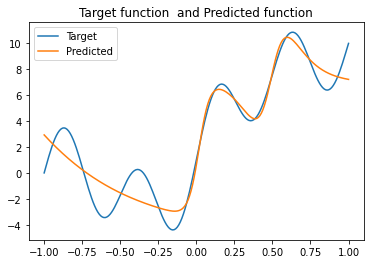

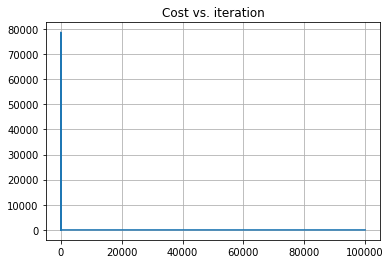

In [8]:
%matplotlib inline
# define a polynomial
def my_func(x):
    
    return 1*x**5 -5*x**4 -7*x**3 + 9*x**2 + 11*x + 1 + 1.5 * np.sin(2 * np.pi * x) + 2.9 * np.sin(2 * 2 * np.pi * x)
    


# make a data set
x_train = np.expand_dims(np.linspace(-1,1,200),axis=0)
y_train = my_func(x_train)



my_fa = FA(n_input_neurons=1,
           n_hidden_neurons=256,
           learning_rate=1e-1,
           n_iters=1_00_000,
           intermidiate_activation_function='sigmoid') 
my_fa.fit(x_train,y_train)


predictions = my_fa.predict(x_train)

fig,ax = plt.subplots(1)
ax.plot(np.ravel(x_train),np.ravel(y_train),label="Target")
ax.plot(np.ravel(x_train),np.ravel(predictions),label="Predicted")
ax.legend()
ax.set_title("Target function  and Predicted function")
plt.show()

my_fa.show_cost_history()


### Approximating a univariate function - with regularization

Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 31.26 secs


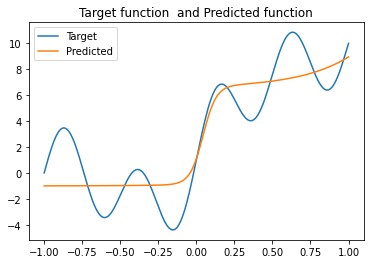

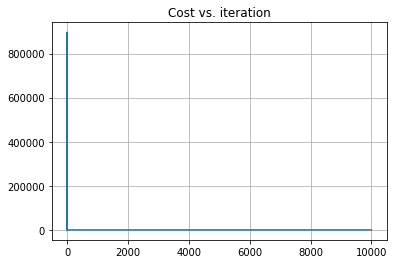

Final cost = 2.215062283324656


In [19]:
seed_value = 42
np.random.seed(seed_value)

%matplotlib inline
# define a polynomial
def my_func(x):
    
    return 1*x**5 -5*x**4 -7*x**3 + 9*x**2 + 11*x + 1 + 1.5 * np.sin(2 * np.pi * x) + 2.9 * np.sin(2 * 2 * np.pi * x)
    


# make a data set
x_train = np.expand_dims(np.linspace(-1,1,200),axis=0)
y_train = my_func(x_train)



my_fa = FA(n_input_neurons=1,
           n_hidden_neurons=512,
           learning_rate=1e-1,
           n_iters=1_0_000,
           intermidiate_activation_function='sigmoid',
          regularization_strength=1e-3) 
my_fa.fit(x_train,y_train)


predictions = my_fa.predict(x_train)

fig,ax = plt.subplots(1)
ax.plot(np.ravel(x_train),np.ravel(y_train),label="Target")
ax.plot(np.ravel(x_train),np.ravel(predictions),label="Predicted")
ax.legend()
ax.set_title("Target function  and Predicted function")
plt.show()

my_fa.show_cost_history()

print(f"Final cost = {my_fa.get_final_cost()}")


Started with regularization_strength = 10.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.65 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.78 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.67 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.78 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.74 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.81 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.75 secs


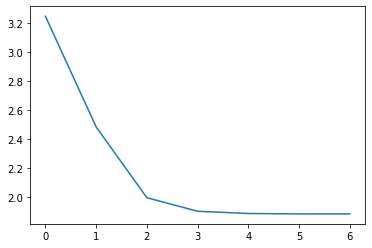

Started with regularization_strength = 10.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.79 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.94 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.88 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.86 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.86 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.84 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.86 secs


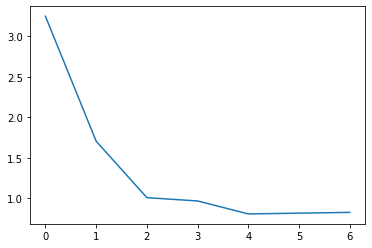

Started with regularization_strength = 10.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.94 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.86 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.86 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.99 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.97 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.91 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 0.88 secs


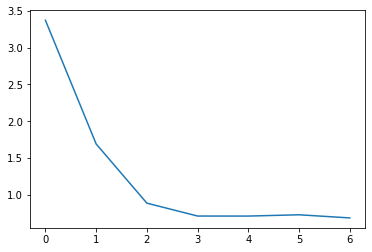

Started with regularization_strength = 10.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.18 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.15 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.08 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.12 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.16 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.15 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.05 secs


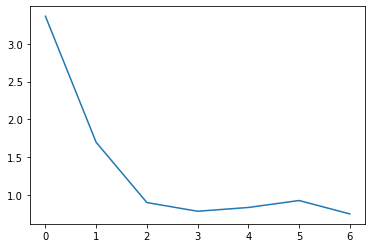

Started with regularization_strength = 10.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.53 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.81 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.72 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.67 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.62 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.64 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 1.58 secs


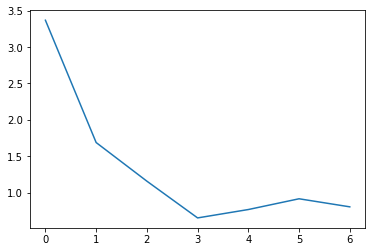

Started with regularization_strength = 10.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 4.3 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 4.56 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 4.67 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 4.89 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 5.38 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 5.08 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 4.69 secs


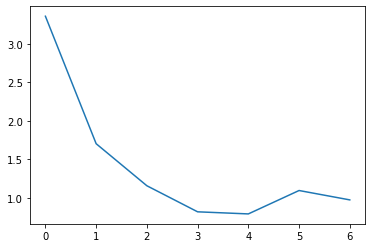

Started with regularization_strength = 10.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 7.29 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 7.23 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 11.59 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 11.39 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 9.63 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 9.28 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 8.88 secs


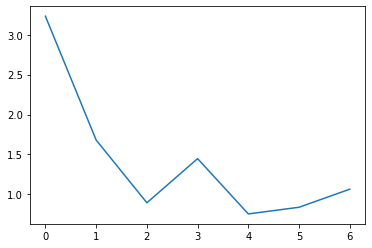

Started with regularization_strength = 10.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 14.17 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 14.24 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 14.32 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 14.19 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 14.37 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 14.39 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 14.31 secs


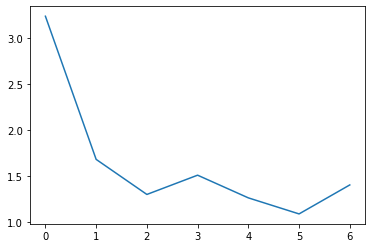

Started with regularization_strength = 10.0


C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_13568/4276376824.py:131: RuntimeWarning: overflow encountered in exp
  return 1/ ( 1 + np.exp(-t) )


Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 27.12 secs
Started with regularization_strength = 1.0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 24.97 secs
Started with regularization_strength = 0.1
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 20.41 secs
Started with regularization_strength = 0.01
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 21.61 secs
Started with regularization_strength = 0.001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 23.22 secs
Started with regularization_strength = 0.0001
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 27.31 secs
Started with regularization_strength = 0
Training ended : n_iters: 10000 with learning_rate : 0.1. Time taken : 31.14 secs


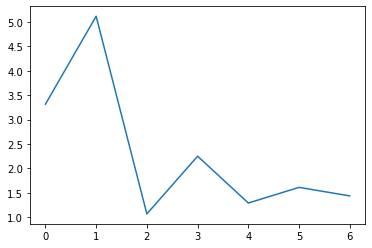

In [22]:
'''
Test with multiple regularization strengths and see the final cost
'''
x_train = np.expand_dims(np.linspace(-1,1,200),axis=0)
y_train = my_func(x_train)


n_hidden_counts = [2,4,8,16,32,64,128,256,512]
regularization_strength_collection = [1e1,1e0,1e-1,1e-2,1e-3,1e-4,0]

final_cost_matrix = np.zeros(( len(n_hidden_counts) , len(regularization_strength_collection) ))


for i,n_hidden in enumerate(n_hidden_counts):
    final_cost_collection = []
    for j,regularization_strength in enumerate(regularization_strength_collection):
        print(f"Started with regularization_strength = {regularization_strength}")
        my_fa = FA(n_input_neurons=1,
               n_hidden_neurons=n_hidden,
               learning_rate=1e-1,
               n_iters=1_0_000,
               intermidiate_activation_function='sigmoid',
              regularization_strength=regularization_strength) 
        my_fa.fit(x_train,y_train)

        final_cost = my_fa.get_final_cost()
        final_cost_matrix[i,j] = final_cost
        final_cost_collection.append(final_cost)

    fig,ax = plt.subplots(1)
    ax.plot(final_cost_collection)
    plt.show()



In [27]:
np.unravel_index(np.argmin(final_cost_matrix),final_cost_matrix.shape)


(4, 3)

### Try to multi-thread


In [72]:
#### from joblib import Parallel,delayed
import os

x_train = np.expand_dims(np.linspace(-1,1,200),axis=0)
y_train = my_func(x_train)


n_hidden_counts = [2,4,8,16,32,64,128,256,512]
regularization_strength_collection = [1e1,1e0,1e-1,1e-2,1e-3,1e-4,0]

def my_train(n_hidden,regularization_strength):
        print(f"Started with regularization_strength = {regularization_strength}")
        my_fa = FA(n_input_neurons=1,
               n_hidden_neurons=n_hidden,
               learning_rate=1e-1,
               n_iters=1_0_000,
               intermidiate_activation_function='sigmoid',
              regularization_strength=regularization_strength) 
        my_fa.fit(x_train,y_train)

        final_cost = my_fa.get_final_cost()
        return n_hidden,regularization_strength,final_cost


        
all_tests = (delayed(my_train)(n_hidden,regularization_strength) for n_hidden in n_hidden_counts for regularization_strength in regularization_strength_collection)

results = Parallel(n_jobs=os.cpu_count()*2,verbose=2)(all_tests)
print(results)


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    9.6s


KeyboardInterrupt: 

In [67]:
# practice nested comprehension
[(a,b)   for a in [1,2,3] if a>=3 
         for b in [5,6,7] if a*b<20]

[(3, 5), (3, 6)]

### Trying drop out

In [28]:
'''
Copied from previous IPYNB : 07--3.1
Added regularization
    THEN Added the dropout
    
Function approximator with dropout class
'''
class FAwD: 
    def __init__(self,
                 n_input_neurons=1,
                 n_hidden_neurons=12,
                 intermidiate_activation_function='sigmoid',
                 learning_rate=1e-2,
                 n_iters=1_000,
                regularization_strength=0,
                dropout_keep_prob=1):
        self.n_input_neurons = n_input_neurons
        self.n_hidden_neurons = n_hidden_neurons
        
        assert intermidiate_activation_function in  ['sigmoid','relu']
        self.activation_function = {'sigmoid':sigmoid,'relu':relu}[intermidiate_activation_function]
        
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization_strength = regularization_strength
        self.dropout_keep_prob = dropout_keep_prob
        
    def fit(self,X,y):
        assert X.shape[0] == self.n_input_neurons
        assert y.shape[0] == 1
        assert y.shape[1] == X.shape[1], "Number of examples : should match in inputs and targets"

        self.cost_history = []

        # define hyper parameters.
        m = y.shape[1] # number of examples given
        n = self.n_input_neurons # input feature count
        h = self.n_hidden_neurons # hidden neuron count

        #initialize weights and biases.
        w = np.random.randn(h,1)
        b = np.random.randn(1,1)
        V = np.random.randn(h,n)
        c = np.random.randn(h,1)

        #fine tune parameters.
        start_time = time.time()
        for i in range(self.n_iters):
                
                # progress message : every 100 iteration except for the first one
                if i and not i%100:
                    time_now = time.time()
                    time_remaining = get_nice_time_dura_str ((self.n_iters - i) * (time_now - start_time) / i)
                    print(f"iteration : {i} ---> ETA : {time_remaining} ",end="\r")
                    

                #forward pass
                H = self.activation_function(V@X + c)
                # drop out
                should_drop = np.random.rand(H.shape[0],H.shape[1]) < self.dropout_keep_prob
                H *= should_drop
                H /= self.dropout_keep_prob
                
                y_pred = w.T@H + b

                #calculate the cost for the current parameters.
                cost = 1/(2*m) * np.sum((y_pred - y)**2)
                self.cost_history.append(cost)

                #backpropagation
                diff = (y_pred - y)
                
                if self.activation_function == sigmoid:
                    high_level_derivative = H * (1 - H)
                elif self.activation_function == relu:
                    high_level_derivative = np.where(H>=0,1.,0.)
 


                dEdb  = diff.sum() / m
                dEdw = H@diff.T / m
                dEdc = w * (high_level_derivative@diff.T) / m
                dEdV = w *  ( (diff * high_level_derivative)@X.T ) / m

                # update rule : gradient decent.
                # consider regularization too 
                b *= (1 - self.regularization_strength * self.learning_rate / m)
                b -= self.learning_rate * dEdb
                w *= (1 - self.regularization_strength * self.learning_rate / m)
                w -= self.learning_rate * dEdw
                V *= (1 - self.regularization_strength * self.learning_rate / m)
                V -= self.learning_rate * dEdV
                c *= (1 - self.regularization_strength * self.learning_rate / m)
                c -= self.learning_rate * dEdc



        #save tuned parameters
        self.b = b
        self.w = w
        self.V = V
        self.c = c
        
        time_now = time.time()
        total_time = get_nice_time_dura_str(time_now - start_time)
        print(f"Training ended : n_iters: {self.n_iters} with learning_rate : {self.learning_rate}. Time taken : {total_time}")
        
    def show_cost_history(self,log=False):
        #plot the cost history
        
        history_vals = self.cost_history
        title = "Cost vs. iteration"
        if log:
            history_vals = np.log(self.cost_history)
            title = "LOG(Cost) vs. iteration"
            
        
        fig,ax = plt.subplots(1)
        ax.plot(history_vals)
        ax.set_title(title)
        ax.grid()
        plt.show()
    
    def get_final_cost(self):
        return self.cost_history[-1]
        
    def predict(self,X):
        
        H = self.activation_function(self.V@X + self.c)
        y_pred = (self.w).T@H + self.b
        
        return y_pred
    
    

    
    
# define activation functions globally
def sigmoid(t):
        return 1/ ( 1 + np.exp(-t) )
      
def relu(t): # from chat gpt : this is safe for any dimension array t
    return np.maximum(0,t)
    
    
    
    
# helper functions
def get_nice_time_dura_str(time_in_secs):
    time_in_secs = round(time_in_secs,2)
    if time_in_secs >= 60:
        n_mins = int(time_in_secs//60)
        n_secs = round(time_in_secs%60,2)
        return f"{n_mins} min {n_secs} secs"
    return f"{time_in_secs} secs"
    
    
    

### Test drop out effect

Training ended : n_iters: 100000 with learning_rate : 0.1. Time taken : 3 min 56.32 secs


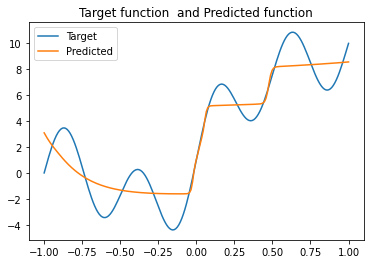

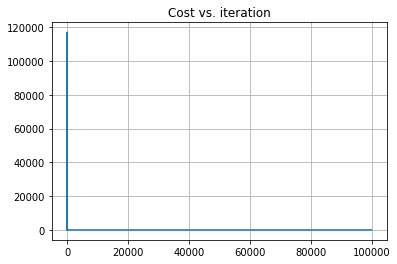

In [45]:
%matplotlib inline
# define a polynomial
def my_func(x):
    
    return 1*x**5 -5*x**4 -7*x**3 + 9*x**2 + 11*x + 1 + 1.5 * np.sin(2 * np.pi * x) + 2.9 * np.sin(2 * 2 * np.pi * x)
    


# make a data set
x_train = np.expand_dims(np.linspace(-1,1,200),axis=0)
y_train = my_func(x_train)



my_fa = FAwD(n_input_neurons=1,
           n_hidden_neurons=256,
           learning_rate=1e-1,
           n_iters=1_00_000,
           intermidiate_activation_function='sigmoid',
             regularization_strength=0,
           dropout_keep_prob=0.9) 
my_fa.fit(x_train,y_train)


predictions = my_fa.predict(x_train)

fig,ax = plt.subplots(1)
ax.plot(np.ravel(x_train),np.ravel(y_train),label="Target")
ax.plot(np.ravel(x_train),np.ravel(predictions),label="Predicted")
ax.legend()
ax.set_title("Target function  and Predicted function")
plt.show()

my_fa.show_cost_history()


In [68]:
# this cell is out of context
import os
# Get the number of available CPU cores using os.cpu_count()
cpu_count = os.cpu_count()
print(cpu_count)

8
